In [365]:
import numpy as np
import matplotlib.pyplot as plt
def tri(a,b,c,d):
    
    # a is middle diagonal
    # b is rightmost diagonal
    # c is leftmost diagonal
    # d is solution to Ax
    
    n = len(d)
    
    m = [0] * n
    l = [0] * (n-1)

    m[0] = a[0]

    for j in range(0,n-1):
        l[j] = c[j] / m[j]
        m[j+1] = a[j+1] - l[j]*b[j]
        
    y = [0] * n
    for j in range(0,n):
        y[j] = d[j] - l[j-1]*y[j-1]    
    
    x = [0] * n 
    x[n-1] = y[n-1] / m[n-1]
    
    for j in range(n-2,-1,-1):
        x[j] = (y[j]-b[j]*x[j+1]) / m[j]
    return x

        

Suppose we have tridiagonal matrix system: $$\begin{bmatrix} 2.04 & -1 & 0\\
-1 &2.04&-1\\
0&-1&2.04\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\\ x_3 \end{bmatrix} = \begin{bmatrix} 48.8 \\ 0.8\\ 0.8 \end{bmatrix}$$.
Using an online calculator, $x= \begin{bmatrix} 35.539 \\ 23.700\\ 12.010 \end{bmatrix}$.
Using our tridiagonal matrix solver, we get:

In [366]:
b = np.array([-1.,-1.])
a = np.array([2.04,2.04,2.04]) 
c = np.array([-1.,-1.])

d = np.array([48.8,0.8,0.8])

print("x = ",tri(a, b, c, d))

x =  [35.53968737754169, 23.700962250185043, 12.010275612835803]


x =  [0.12310824371984863, 0.24571060925961694, 0.36730329720117705, 0.48738665710822743, 0.60546724069711, 0.7210598295216523, 0.8336894288398415, 0.9428932194691062, 1.048222459609611, 1.1492443288205674, 1.2455437065722648, 1.3367248780653693, 1.4224131603079162, 1.5022564417680917, 1.5759266292760459, 1.643120996229103, 1.7035634265603061, 1.757005549358564, 1.8032277594779988, 1.8420401199425975, 1.8732831424379857, 1.8968284426831221, 1.912579267988849, 1.920470894835443, 1.9204708948354432, 1.9125792679888494, 1.8968284426831228, 1.873283142437986, 1.842040119942598, 1.8032277594779993, 1.7570055493585641, 1.7035634265603061, 1.643120996229103, 1.5759266292760459, 1.5022564417680917, 1.4224131603079162, 1.3367248780653693, 1.2455437065722645, 1.1492443288205672, 1.0482224596096108, 0.9428932194691059, 0.8336894288398412, 0.7210598295216519, 0.6054672406971098, 0.4873866571082274, 0.3673032972011771, 0.24571060925961696, 0.12310824371984865]


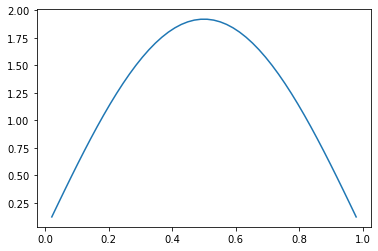

In [381]:
# for question two, the middle diagonal will consist of 2s, and the other 2 will consist of -1s

a1 = [2]*48
b1 = [-1]*47
c1 = [-1]*47

x1 = np.linspace(0,1,50)

d1 = []

for i in range(1,49):
    d1.append((2 * ((np.pi)**2) * np.sin(x1[i] * np.pi)) / (2500))
len(d1)

print("x = ",tri(a1, b1, c1, d1))

x1 = np.delete(x1, 0)
x1 = np.delete(x1, 48)

plt.plot(x1, tri(a1, b1, c1, d1))



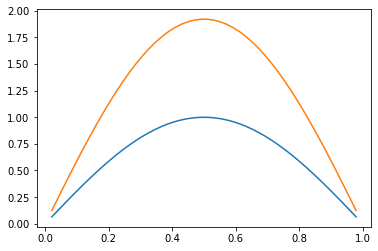

In [377]:
#checking to see how result accurate result is:

f = []
for j in range(0,48):
    f.append(np.sin(np.pi*x1[j]))


plt.plot(x1,f)
plt.plot(x1,tri(a1, b1, c1, d1))

# not very accurate

The error is $O(h^2)=O(1/2500)$ so when N = 100, the error should be $O(h^2) = O(1/10000)$. So, the error should reduce by a factor of 4. 

x =  [0.062198314541568586, 0.12433400065271917, 0.1863444929645544, 0.24816735216772065, 0.30974032788349964, 0.37100142134466324, 0.43188894782297654, 0.49234159874049066, 0.5522985034020833, 0.6116992902870896, 0.6704841478383052, 0.7285938846871551, 0.7859699892543841, 0.842554688666257, 0.8982910069269457, 0.9531228222885271, 1.006994923760826, 1.0598530667042023, 1.1116440274493051, 1.1623156568887958, 1.211816932987079, 1.2600980121551668, 1.3071102794389493, 1.3528063974703306, 1.3971403541319474, 1.4400675088874697, 1.4815446377308383, 1.521529976709173, 1.559983263975535, 1.5968657803291928, 1.632140388202575, 1.6657715690556538, 1.6977254591401034, 1.727969883597224, 1.7564743888552967, 1.7832102732937505, 1.80815061614326, 1.8312703045926775, 1.8525460590755072, 1.8719564567104532, 1.8894819528724458, 1.9051049008724228, 1.9188095697260488, 1.9305821599934831, 1.9404108176742463, 1.9482856461431932, 1.9541987161155763, 1.9581440736311626, 1.960117746049368, 1.96011774604936

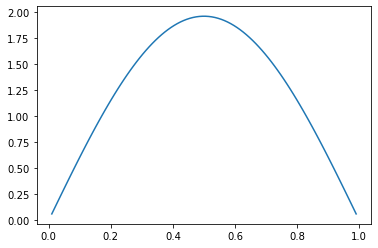

In [369]:
a2 = [2]*98
b2 = [-1]*97
c2 = [-1]*97

x2 = np.linspace(0,1,100)


d2 = []

for i in range(1,99):
    d2.append((2 * ((np.pi)**2) * np.sin(x2[i] * np.pi)) / (10000))


print("x = ",tri(a2, b2, c2, d2))

x2 = np.delete(x2,0)
x2 = np.delete(x2, 98)


plt.plot(x2, tri(a2, b2, c2, d2))

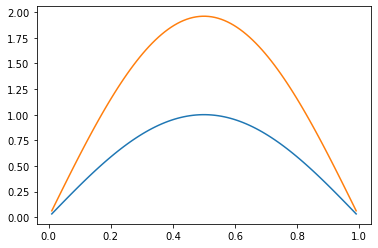

In [389]:
# checking accuracy
f2 = []
for j in range(0,98):
    f2.append(np.sin(np.pi*x2[j]))
plt.plot(x2,f2)
plt.plot(x2,tri(a2, b2, c2, d2))



In order to check convergence and rate of convergence in real life problems, we could look for common nodes for each N and compute their ratios in terms of the trapezoidal rule $2^p=\dfrac{u_h−u_{h/2}}{u_{h/2}−u_{h/4}}$ The largest ratio is a good estimate of rate of convergence.